In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("Occupancy_Estimation.csv")

**EDA**

In [2]:
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
print('Dataset info:')
print(df.info())

print('\nDataset describe:')
print(df.describe())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO

In [4]:
# Deal with Date column
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
# Deal with Time column
df[['hours', 'minutes', 'seconds']] = df['Time'].str.split(':', expand=True)
df['hours'] = df['hours'].astype(int)
df['minutes'] = df['minutes'].astype(int)
df['seconds'] = df['seconds'].astype(int)
# Delete actual Date and time features after split it.
df = df.drop(['Date', 'Time'],axis=1)


In [5]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,...,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,year,month,day,hours,minutes,seconds
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,...,0.769231,0,0,1,2017,12,22,10,49,41
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,...,0.646154,0,0,1,2017,12,22,10,50,12
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,...,0.519231,0,0,1,2017,12,22,10,50,42
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,...,0.388462,0,0,1,2017,12,22,10,51,13
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,...,0.253846,0,0,1,2017,12,22,10,51,44


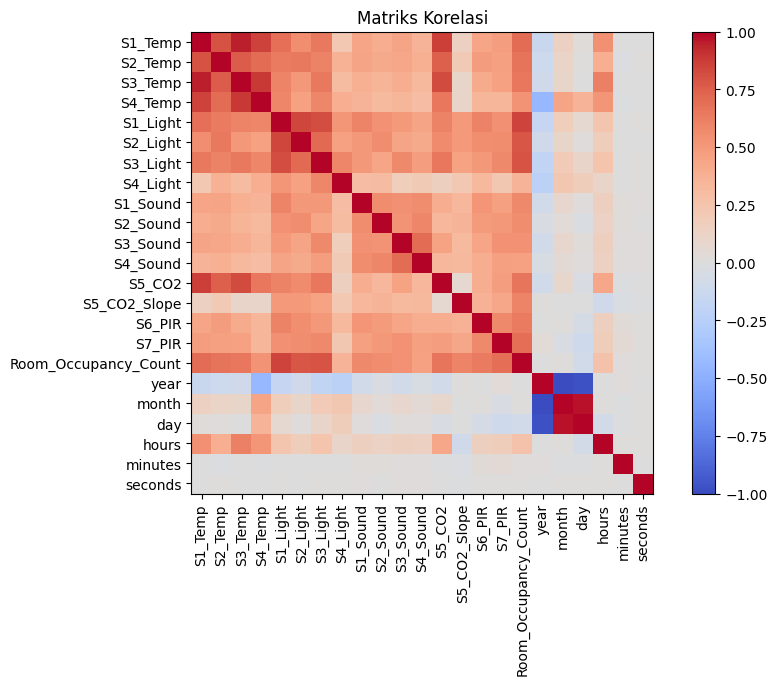

In [6]:
# Check correlation between all features
import matplotlib.pyplot as plt
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Matriks Korelasi')
plt.show()

In [7]:
# Drop new features after I noticed that there is no strong relationship.
df = df.drop(['year','month','day','minutes','seconds'],axis=1)

In [8]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,hours
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1,10
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1,10
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1,10
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1,10
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1,10


**Plot Temp sensors**

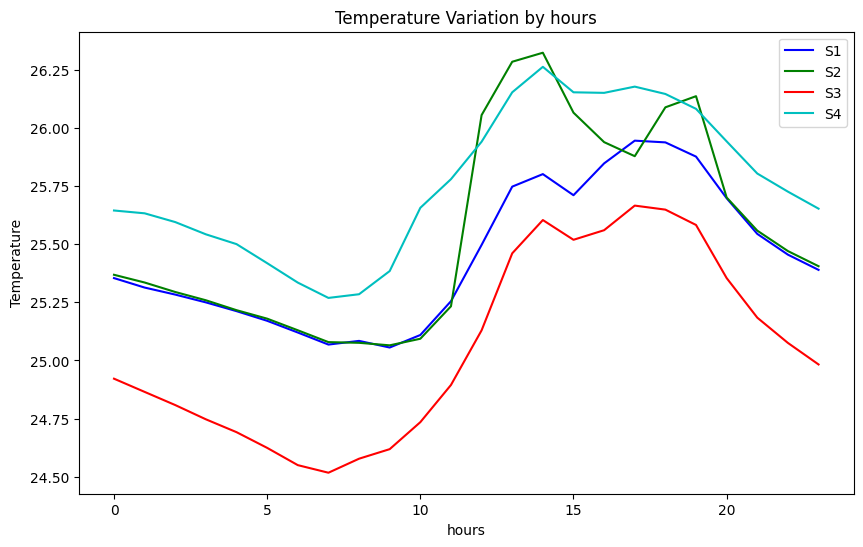

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sensors = ['S1', 'S2', 'S3', 'S4']
colors = ['b', 'g', 'r', 'c']

plt.figure(figsize=(10, 6))

for sensor, color in zip(sensors, colors):
    sensor_df = df[[f'{sensor}_Temp', 'hours']].groupby(['hours']).mean()
    plt.plot(sensor_df.index, sensor_df[f'{sensor}_Temp'], label=sensor, color=color)

plt.title('Temperature Variation by hours')
plt.xlabel('hours')
plt.ylabel('Temperature')
plt.legend()
plt.show()


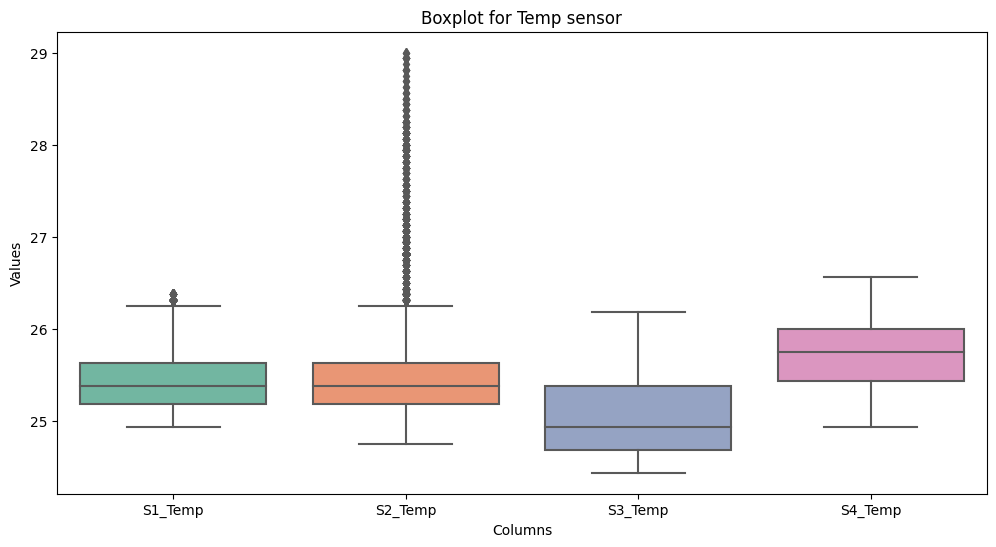

In [10]:
X = df[['S1_Temp','S2_Temp','S3_Temp','S4_Temp']]
plt.figure(figsize=(12, 6))
sns.boxplot(data=X, palette="Set2")
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot for Temp sensor')
plt.show()


**Plot Light sensors**

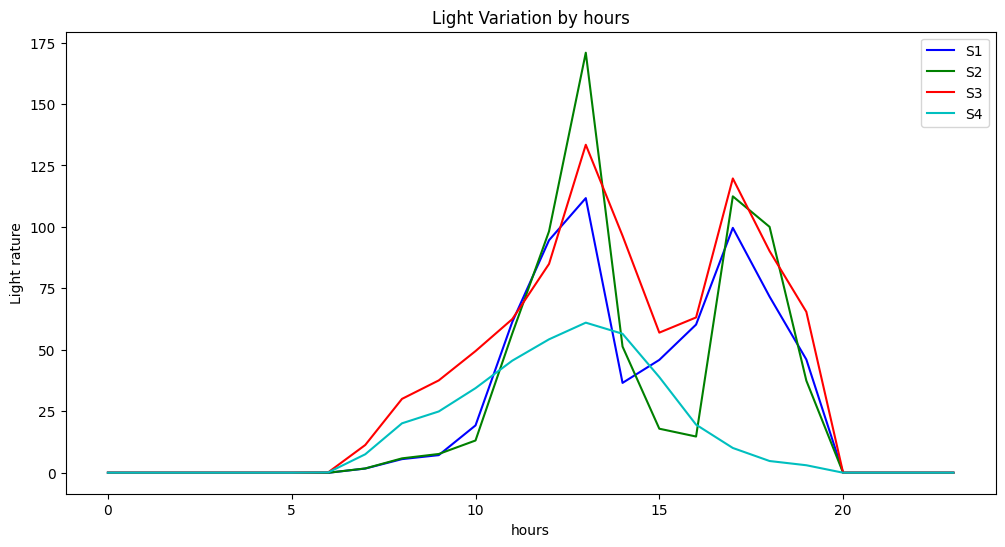

In [11]:
sensors = ['S1', 'S2', 'S3', 'S4']
colors = ['b', 'g', 'r', 'c'] 

plt.figure(figsize=(12, 6))

for sensor, color in zip(sensors, colors):
    sensor_df = df[[f'{sensor}_Light', 'hours']].groupby(['hours']).mean()
    plt.plot(sensor_df.index, sensor_df[f'{sensor}_Light'], label=sensor, color=color)

plt.title('Light Variation by hours')
plt.xlabel('hours')
plt.ylabel('Light rature')
plt.legend()
plt.show()


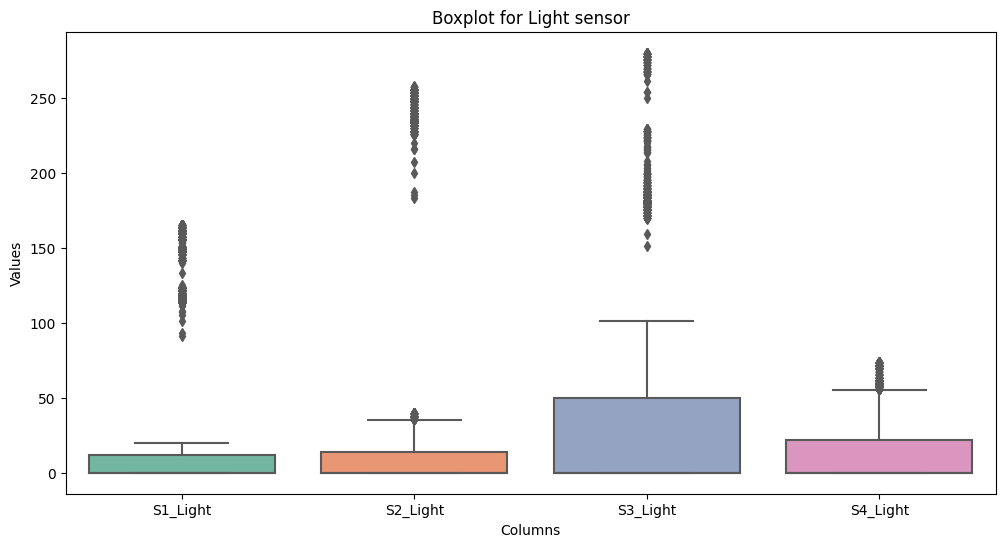

In [12]:
X = df[['S1_Light','S2_Light','S3_Light','S4_Light']]
plt.figure(figsize=(12, 6))
sns.boxplot(data=X, palette="Set2")
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot for Light sensor')
plt.show()

**Plot Sound sensors**

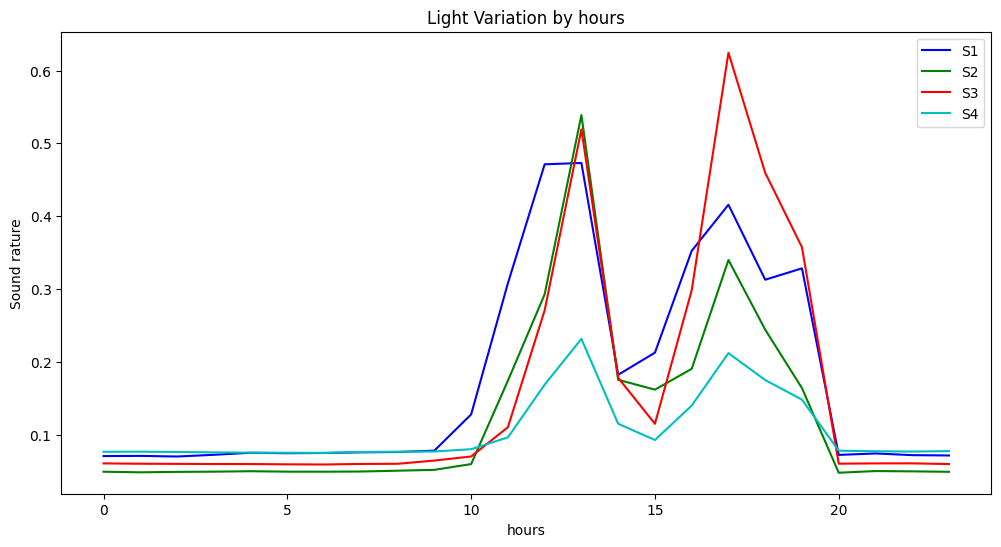

In [13]:
sensors = ['S1', 'S2', 'S3', 'S4']
colors = ['b', 'g', 'r', 'c']

plt.figure(figsize=(12, 6))

for sensor, color in zip(sensors, colors):
    sensor_df = df[[f'{sensor}_Sound', 'hours']].groupby(['hours']).mean()
    plt.plot(sensor_df.index, sensor_df[f'{sensor}_Sound'], label=sensor, color=color)

plt.title('Light Variation by hours')
plt.xlabel('hours')
plt.ylabel('Sound rature')
plt.legend()
plt.show()


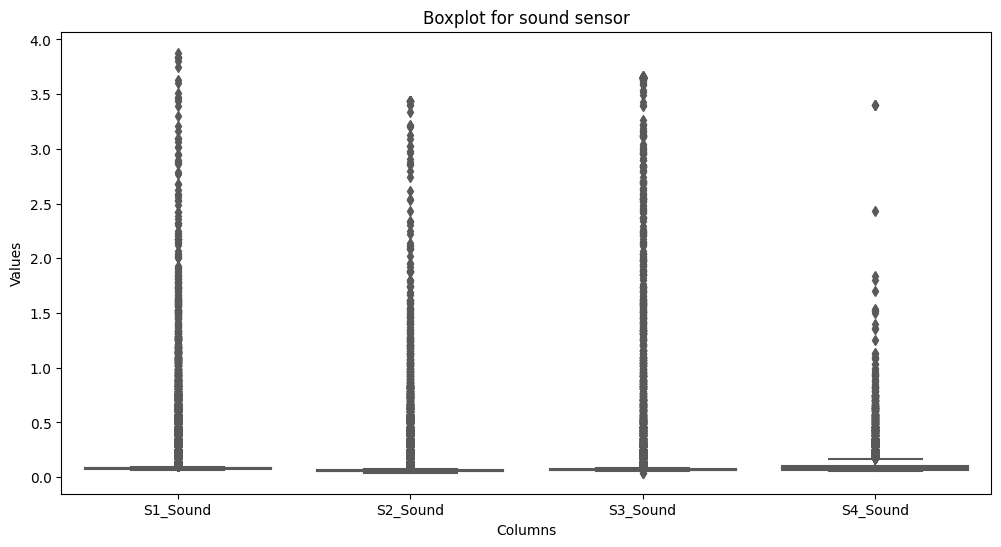

In [14]:
X = df[['S1_Sound','S2_Sound','S3_Sound','S4_Sound']]
plt.figure(figsize=(12, 6))
sns.boxplot(data=X, palette="Set2")
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot for sound sensor')
plt.show()

**Plot CO2 sensor**

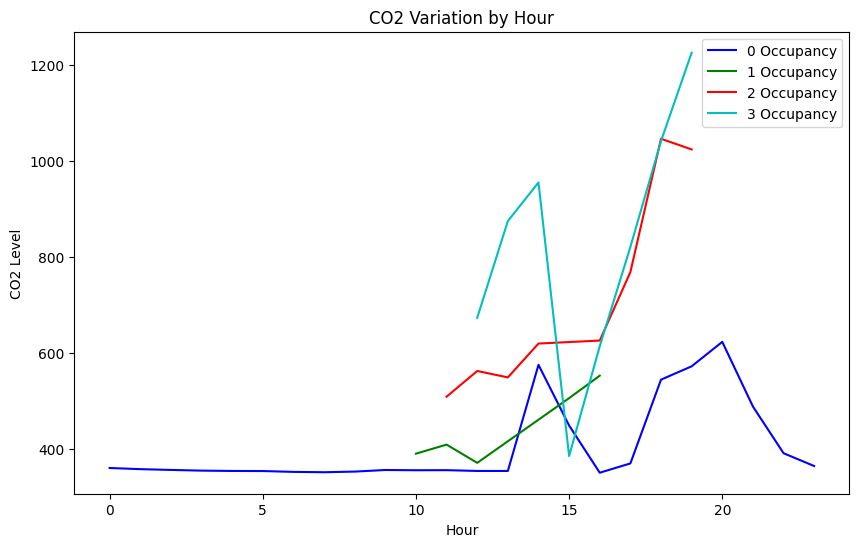

In [15]:
occupancy_levels = [0, 1, 2, 3]
colors = ['b', 'g', 'r', 'c']

plt.figure(figsize=(10, 6))

for occupancy, color in zip(occupancy_levels, colors):
    occupancy_df = df[df['Room_Occupancy_Count'] == occupancy][['S5_CO2', 'hours']].groupby(['hours']).mean()
    plt.plot(occupancy_df.index, occupancy_df['S5_CO2'], label=f'{occupancy} Occupancy', color=color)

plt.title('CO2 Variation by Hour')
plt.xlabel('Hour')
plt.ylabel('CO2 Level')
plt.legend()
plt.show()


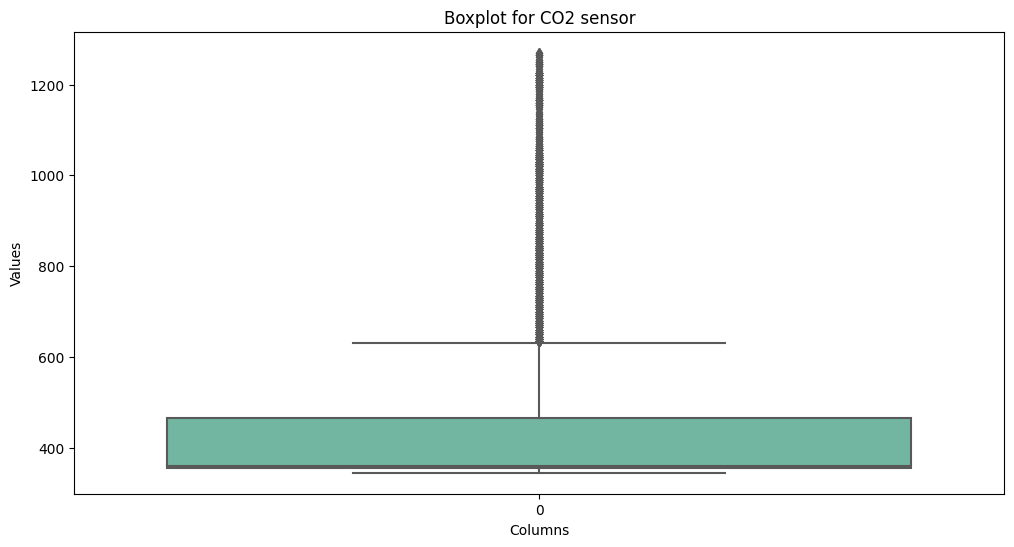

In [16]:
X = df['S5_CO2']
plt.figure(figsize=(12, 6))
sns.boxplot(data=X, palette="Set2")
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot for CO2 sensor')
plt.show()

**Plot PIR sensors**

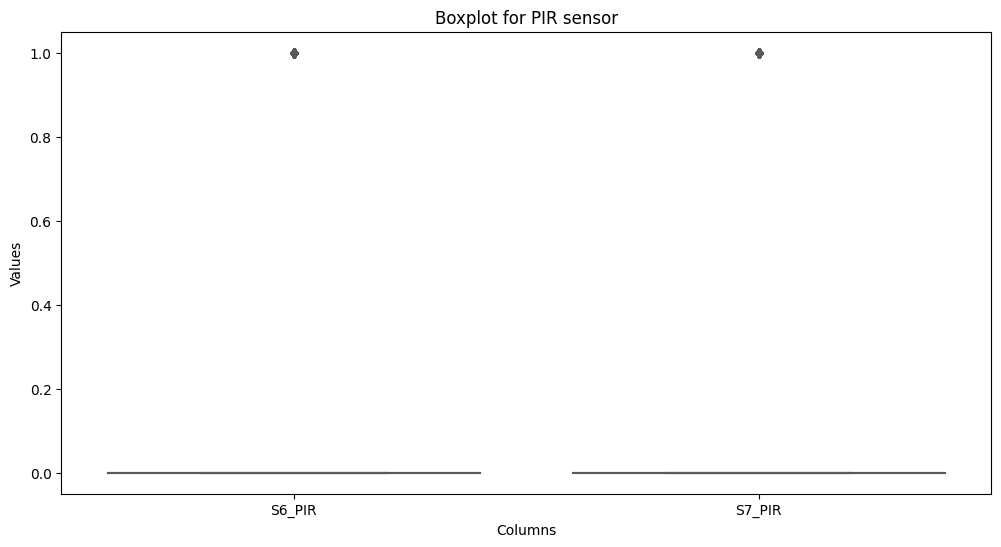

In [17]:
X = df[['S6_PIR','S7_PIR']]
plt.figure(figsize=(12, 6))
sns.boxplot(data=X, palette="Set2")
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot for PIR sensor')
plt.show()

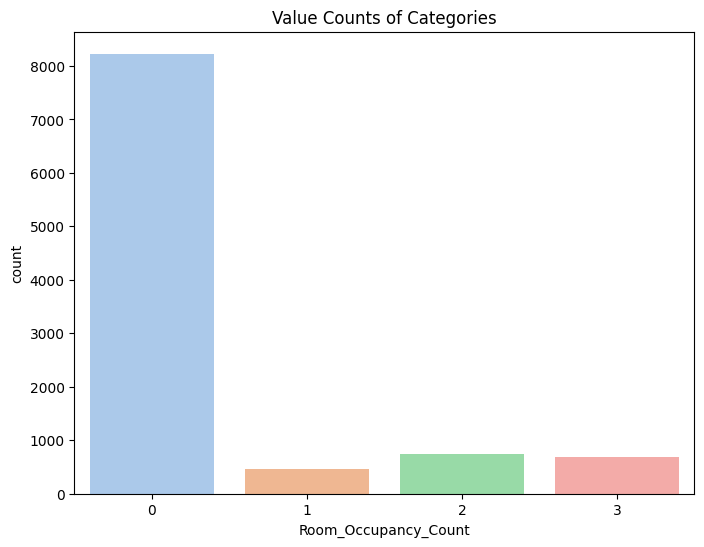

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Room_Occupancy_Count', data=df, palette='pastel')
plt.title('Value Counts of Categories')
plt.show()

**Modeling**

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score


X = df.drop('Room_Occupancy_Count',axis=1)
y = df['Room_Occupancy_Count']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Random Forest**

In [20]:
# Random Forest
rf_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini','entropy']
}
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
y_pred = rf_grid_search.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", rf_accuracy)
rf_F1 = f1_score(y_test, y_pred, average='macro')
print('F1_score :',rf_F1)
rf_precision = precision_score(y_test, y_pred,average='macro')
print('Precision :',rf_precision)
rf_recall = recall_score(y_test,y_pred,average='macro')
print('Recall :', rf_recall)

Best Random Forest Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 50}
Accuracy : 0.9985192497532083
F1_score : 0.9947129782640354
Precision : 0.9942766972291512
Recall : 0.9951655052264808


**Gradient Boosting**

In [21]:
# Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_grid_search = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)
print("Best Gradient Boosting Parameters:", gb_grid_search.best_params_)
y_pred = gb_grid_search.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", gb_accuracy)
gb_F1 = f1_score(y_test, y_pred, average='macro')
print('F1_score :',gb_F1)
gb_precision = precision_score(y_test, y_pred,average='macro')
print('Precision :',gb_precision)
gb_recall = recall_score(y_test,y_pred,average='macro')
print('Recall :', gb_recall)

Best Gradient Boosting Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Accuracy : 0.9960513326752222
F1_score : 0.9884205409726722
Precision : 0.9904166420385727
Recall : 0.9864982578397212


**XGBoost**

In [22]:
# XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
xgb_grid_search = GridSearchCV(XGBClassifier(), xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)
print("Best XGBoost Parameters:", xgb_grid_search.best_params_)
y_pred = xgb_grid_search.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", xgb_accuracy)
xgb_F1 = f1_score(y_test, y_pred, average='macro')
print('F1_score :',xgb_F1)
xgb_precision = precision_score(y_test, y_pred,average='macro')
print('Precision :',xgb_precision)
xgb_recall = recall_score(y_test,y_pred,average='macro')
print('Recall :', xgb_recall)

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Accuracy : 0.9975320829220138
F1_score : 0.992747249259937
Precision : 0.993942365738864
Recall : 0.9915940766550523


**SVM**

In [23]:
# Support Vector Machine (SVM)
svm_param_grid = {
    'C': [0.01,0.1],
    'kernel': ['rbf', 'poly' , 'linear'],
    'gamma': ['scale', 'auto']
}
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)
print("Best SVM Parameters:", svm_grid_search.best_params_)
y_pred = svm_grid_search.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", svm_accuracy)
svm_F1 = f1_score(y_test, y_pred, average='macro')
print('F1_score :',svm_F1)
svm_precision = precision_score(y_test, y_pred,average='macro')
print('Precision :',svm_precision)
svm_recall = recall_score(y_test,y_pred,average='macro')
print('Recall :', svm_recall)

Best SVM Parameters: {'C': 0.01, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy : 0.9955577492596249
F1_score : 0.9843183273781434
Precision : 0.9834656084656085
Recall : 0.9852351916376307


In [24]:
result = {'Random Forest': [rf_accuracy,rf_F1,rf_precision,rf_recall],
          'Gradient Boosting': [gb_accuracy,gb_F1,gb_precision,gb_recall],
          'XGBoost': [xgb_accuracy,xgb_F1,xgb_precision,xgb_recall],
          'SVM': [svm_accuracy,svm_F1,svm_precision,svm_recall]}

row_names = ['Accuracy','F1_score','Precision','Recall']

df = pd.DataFrame(result, index=row_names)
df

,Random Forest,Gradient Boosting,XGBoost,SVM
Accuracy,0.998519,0.996051,0.997532,0.995558
F1_score,0.994713,0.988421,0.992747,0.984318
Precision,0.994277,0.990417,0.993942,0.983466
Recall,0.995166,0.986498,0.991594,0.985235
